In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from common import *
import numpy as np
plt.style.use('thesis.mplstyle')

In [2]:
validationData = pd.read_excel(r'fingerprintingFindings_entry-sheet.xlsx',index_col='index')\
    .astype({'isFingerprinting':'bool'})\
    .astype({'partOfSelection':'bool'})
validationData = validationData[validationData.partOfSelection]
validationData

,partOfSelection,domain,consentMode,pageHost,destinationHost,destinationCategory,isFingerprinting,attributeCount,category,name,remarks
index,,,,,,,,,,,
1,True,tile.com,rejectAll,tile.com,csftr.com,third-party,True,12,miscellaneous,unknown fingerprinter,NaN
2,True,websteronline.com,doNothing,websteronline.com,youtube.com,third-party,True,7,content,YouTube,NaN
3,True,roboticsandautomationnews.com,doNothing,roboticsandautomationnews.com,google.com,third-party,True,7,general analytics,Google Analytics,NaN
4,True,unoeuro.com,acceptAll,simply.com,teamblue.services,third-party,True,10,miscellaneous,unknown fingerprinter,NaN
5,True,timeout.com,acceptAll,timeoutkorea.kr,adsafeprotected.com,third-party,True,13,advertising analytics,AdSafeProtected,NaN
...,...,...,...,...,...,...,...,...,...,...,...
96,True,imsa.com,acceptAll,imsa.com,moatads.com,third-party,True,10,advertising analytics,Oracle Moat Measurement,NaN
97,True,wufoo.eu,rejectAll,wufoo.com,youtube.com,third-party,True,7,content,YouTube,NaN
98,True,motogp.com,doNothing,motogp.com,youtube.com,third-party,True,7,content,YouTube,NaN


In [3]:
cats = validationData.category.value_counts()
cats

general analytics        29
content                  20
advertising              17
advertising analytics    14
miscellaneous            10
security                 10
Name: category, dtype: int64

In [4]:
names = validationData.name.value_counts()
names

YouTube                    18
Google Ads                 16
Google Analytics           11
Oracle Moat Measurement    10
Microsoft Clarity           9
Akamai                      7
Hubspot                     5
unknown fingerprinter       4
Collection of Trackers      4
AdSafeProtected             3
AppsFlyer                   2
FingerprintJS               2
Riskified                   1
Piano IO                    1
TikTok                      1
Dailymotion                 1
MonetizeMore                1
DataDome                    1
Chartbeat                   1
HigherEducation.com         1
Sift                        1
Name: name, dtype: int64

In [5]:
counts = validationData.pivot_table(index=['category','name'],aggfunc={'domain':'count'}).reset_index()
counts.rename({'domain':'nameCount'},axis=1,inplace=True)
counts['catCount'] = counts.groupby('category')['nameCount'].transform('sum')
counts

,category,name,nameCount,catCount
0,advertising,Google Ads,16,17
1,advertising,HigherEducation.com,1,17
2,advertising analytics,AdSafeProtected,3,14
3,advertising analytics,MonetizeMore,1,14
4,advertising analytics,Oracle Moat Measurement,10,14
5,content,Dailymotion,1,20
6,content,TikTok,1,20
7,content,YouTube,18,20
8,general analytics,AppsFlyer,2,29
9,general analytics,Chartbeat,1,29


In [6]:
cats =counts[['category','catCount']].drop_duplicates()

In [7]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
cycle

['#003688',
 '#EE7C0E',
 '#00782A',
 '#E32017',
 '#9364CD',
 '#B36305',
 '#F3A9BB',
 '#A0A5A9',
 '#FFD300',
 '#00A4A7']

In [8]:
innerColors = cycle[0:cats.shape[0]]
innerColors

['#003688', '#EE7C0E', '#00782A', '#E32017', '#9364CD', '#B36305']

In [9]:
outerColors = []
innerCounter = -1
activeCategory = ''
for index, countsLine in counts.iterrows():
    if countsLine.category != activeCategory:
        activeCategory = countsLine.category
        innerCounter+=1
    outerColors.append(innerColors[innerCounter])
outerColors

['#003688',
 '#003688',
 '#EE7C0E',
 '#EE7C0E',
 '#EE7C0E',
 '#00782A',
 '#00782A',
 '#00782A',
 '#E32017',
 '#E32017',
 '#E32017',
 '#E32017',
 '#E32017',
 '#E32017',
 '#9364CD',
 '#9364CD',
 '#9364CD',
 '#B36305',
 '#B36305',
 '#B36305',
 '#B36305']

c:\SAPDevelop\master-thesis\data\common.py:224: UserWarning: Glyph 160 (\N{NO-BREAK SPACE}) missing from current font.
  fig.savefig('images/' + name + '.pdf')
c:\SAPDevelop\master-thesis\data\common.py:225: UserWarning: Glyph 160 (\N{NO-BREAK SPACE}) missing from current font.
  fig.savefig('images/' + name + '.svg')
c:\Users\I544275\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 160 (\N{NO-BREAK SPACE}) missing from current font.
  func(*args, **kwargs)
c:\Users\I544275\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 160 (\N{NO-BREAK SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


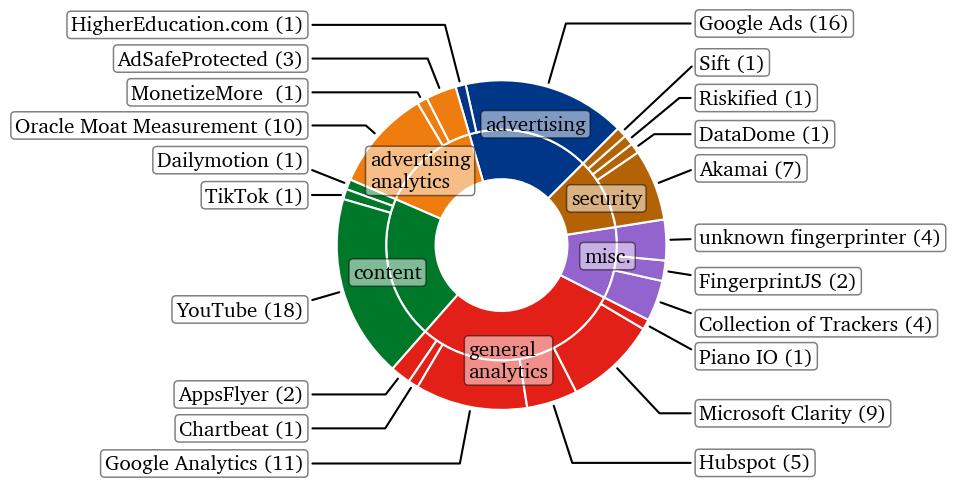

In [10]:
fig, ax = plt.subplots()
fig.set_figwidth(6.256)
fig.set_figheight(3.1)

size = 0.3
innerPatches, innerLabels = ax.pie(
    cats.catCount,
    # labels=cats.category,
    # labeldistance=0.5,
#     rotatelabels=True,
    radius=1-size,
    wedgeprops=dict(width=size, edgecolor='w'),
    colors=innerColors,
    startangle = 45,
)

outerPatches, outerLabels = ax.pie(
    counts.nameCount,
    # labels=counts.name + ' (' + counts.nameCount.astype('str') + ')',
    labeldistance=1.1,
    radius=1,
    wedgeprops=dict(width=size, edgecolor='w'),
    colors=outerColors,
    textprops=dict(fontsize='small'),
    startangle = 45,
)

innerKw = dict(bbox = dict(boxstyle="round,pad=0.2", fc="w", ec="k", lw=0.72,alpha = 0.5))
ax.annotate('advertising\nanalytics',(-0.8,0.35),**innerKw)
ax.annotate('content',(-0.9,-0.2),**innerKw)
ax.annotate('general\nanalytics',(-0.2,-0.8),**innerKw)
ax.annotate('misc.',(+0.5,-0.1),**innerKw)
ax.annotate('advertising',(-0.1,+0.7),**innerKw)
ax.annotate('security',(+0.42,+0.25),**innerKw)


bbox_props = dict(boxstyle="round,pad=0.2", fc="w", ec="k", lw=0.72,alpha = 0.5)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")


def adjustAngle(angle,counter):
    adjustments = {
        # 0:15,
    }
    return angle + adjustments.get(counter,0)

def adjustTextY(textY,counter):
    adjustments = {
        0:  +0.00,
        1:  -0.02,  # HigherEducation
        2:  -0.17,  # AdSafeProtected
        3:  -0.30,
        4:  -0.20,
        6:  -0.13,  # TikTok
        8:  +0.20,  # AppsFlyer
        9:  +0.07,  # Chartbeat
        10: +0.05,  # Google Analytics
        11: +0.01,  # Hubspot
        20: +0.15,  # Sift
        18: -0.15,  # DataDome
        17: -0.05,  # Akamai
    }
    return textY + adjustments.get(counter,0)

extraArtists = []

counter = 0
for i, p in enumerate(outerPatches):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    ang = adjustAngle(ang,counter)
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    labeltext = counts.name.values[i] + ' (' + str(counts.nameCount.values[i]) + ')'
    extraArtists.append(ax.annotate(labeltext, xy=(x, y), xytext=(1.20*np.sign(x), adjustTextY(1.4*y,counter)),
                horizontalalignment=horizontalalignment, **kw))
    counter+=1

saveFigure(fig,'fingerprinting_scan_activity-classification')


In [11]:
validationData.groupby('category')['attributeCount'].mean()

category
advertising               7.058824
advertising analytics    10.357143
content                   7.100000
general analytics         7.413793
miscellaneous             9.900000
security                 15.500000
Name: attributeCount, dtype: float64